<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Hierarchical clustering lab
---

For this exercise we are using the US Arrest data which is one of the datasets provided by R, more information can be found [here]( https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/USArrests.html).
It contains data on the rate of arrests for murder, assault and rape per 100000 inhabitants and the percentage of urban population per US state.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 

sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
from sklearn import cluster, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist

#### 1. Load the dataset from the provided file

In [3]:
df = pd.read_csv('../../../../resource-datasets/usa_arrest/USArrests.csv')
df = df.rename(columns={'Unnamed: 0': 'States'})
df.head()

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


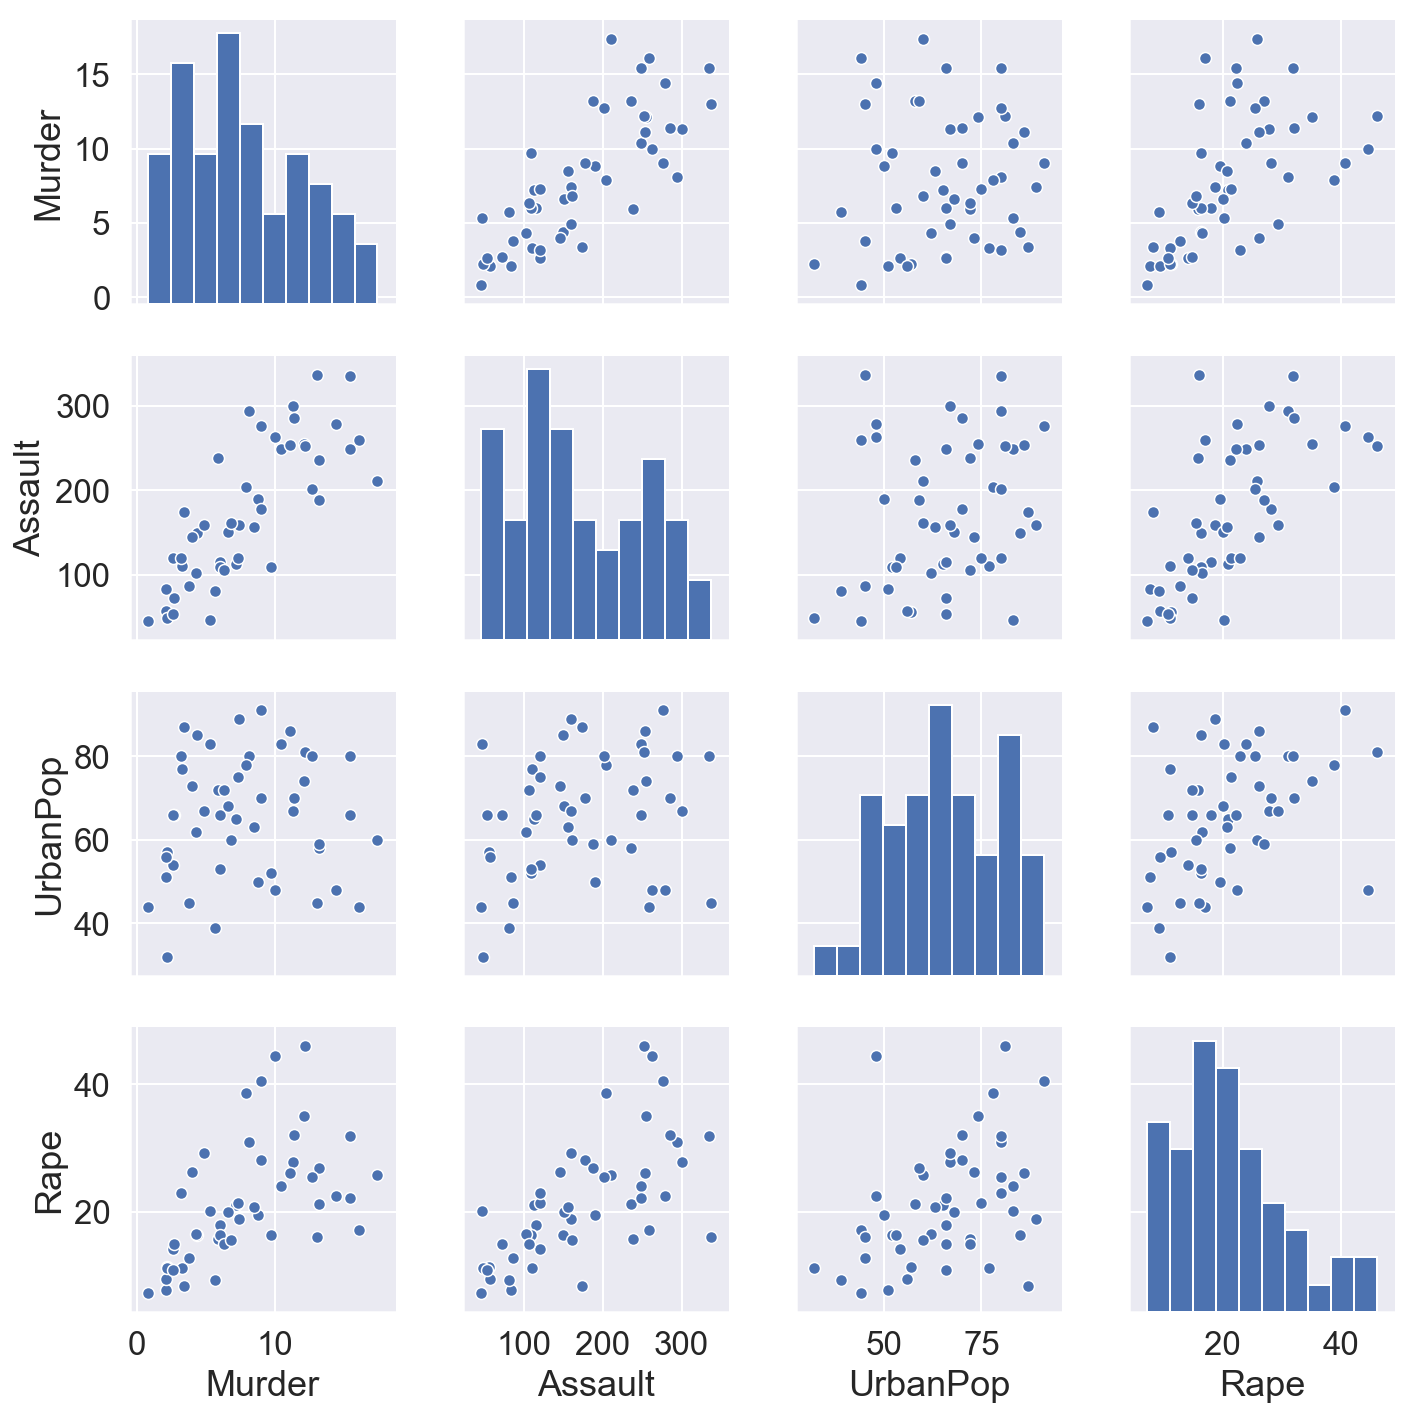

In [5]:
sns.pairplot(df)
plt.show()

#### 2. Standardize the data

In [114]:
X = df.loc[:,'Murder':'Rape']
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

#### 3. Obtain the principal components for the rescaled data of 2.

- Determine the eigenvectors and explained variance ratio
- Plot the principal components versus each other

In [115]:
pca = PCA()
pca.fit(X)
print('Eigenvectors:')
print(pca.components_)
print('Explained Variance Ratio:')
print(pca.explained_variance_ratio_)

Eigenvectors:
[[ 0.53589947  0.58318363  0.27819087  0.54343209]
 [ 0.41818087  0.1879856  -0.87280619 -0.16731864]
 [-0.34123273 -0.26814843 -0.37801579  0.81777791]
 [ 0.6492278  -0.74340748  0.13387773  0.08902432]]
Explained Variance Ratio:
[0.62006039 0.24744129 0.0891408  0.04335752]


In [116]:
col = ['PC{}'.format(i) for i in range(1,5)]
pd.DataFrame(pca.components_, index=X.columns, columns=col)

,PC1,PC2,PC3,PC4
Murder,0.535899,0.583184,0.278191,0.543432
Assault,0.418181,0.187986,-0.872806,-0.167319
UrbanPop,-0.341233,-0.268148,-0.378016,0.817778
Rape,0.649228,-0.743407,0.133878,0.089024


In [23]:
cols = ['PC{}'.format(i) for i in range(1,pca.n_components_+1)]
df_pca = pd.DataFrame(pca.fit_transform(Xs), columns=cols)
df_pca['States'] = df.States

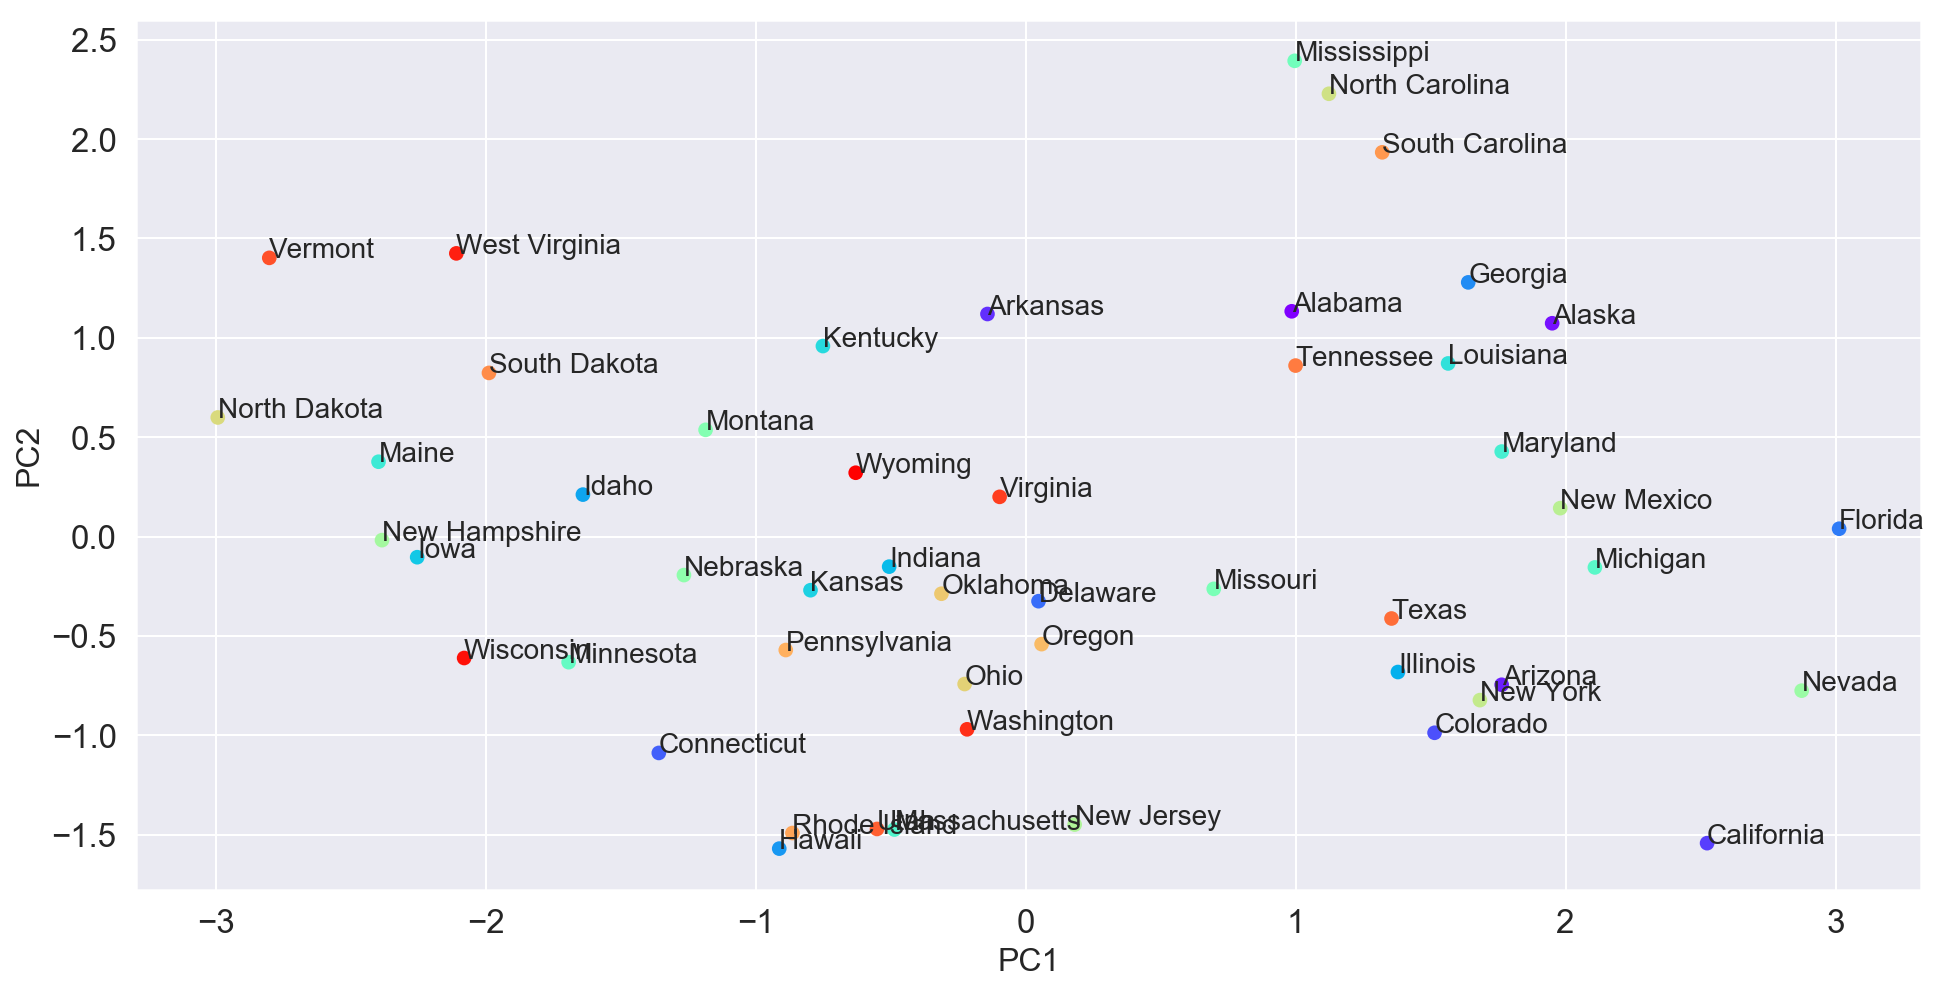

In [24]:
# With column names PC1,PC2 and states, the result from the PCA can be 
# plotted with the following code:

fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df_pca.PC1,df_pca.PC2, s = 40, c=df.index, cmap='rainbow')
for i, xi in enumerate(df_pca['States']):
   ax.annotate(xi, (df_pca.iloc[i,0], df_pca.iloc[i,1]),fontsize=14)
ax.set_xlabel('PC1',fontsize=16)
ax.set_ylabel('PC2',fontsize=16)
plt.show()

# better idea to plot vs. the main PCs as this is essentially twisting and 
# looking at the data from a more informative angle

#### 4. Perform hierarchical clustering on the rescaled dataset obtained in 2

- Calculate the cophenetic correlation and distances 
- Plot the resulting dendrogram
- Produce a scatter plot of the data using the cluster labels for coloring

In [26]:
Z = linkage(X)
c, coph_dists = cophenet(Z, pdist(X, metric='euclidean'))

Text(0.5,1,'Dendrogram')

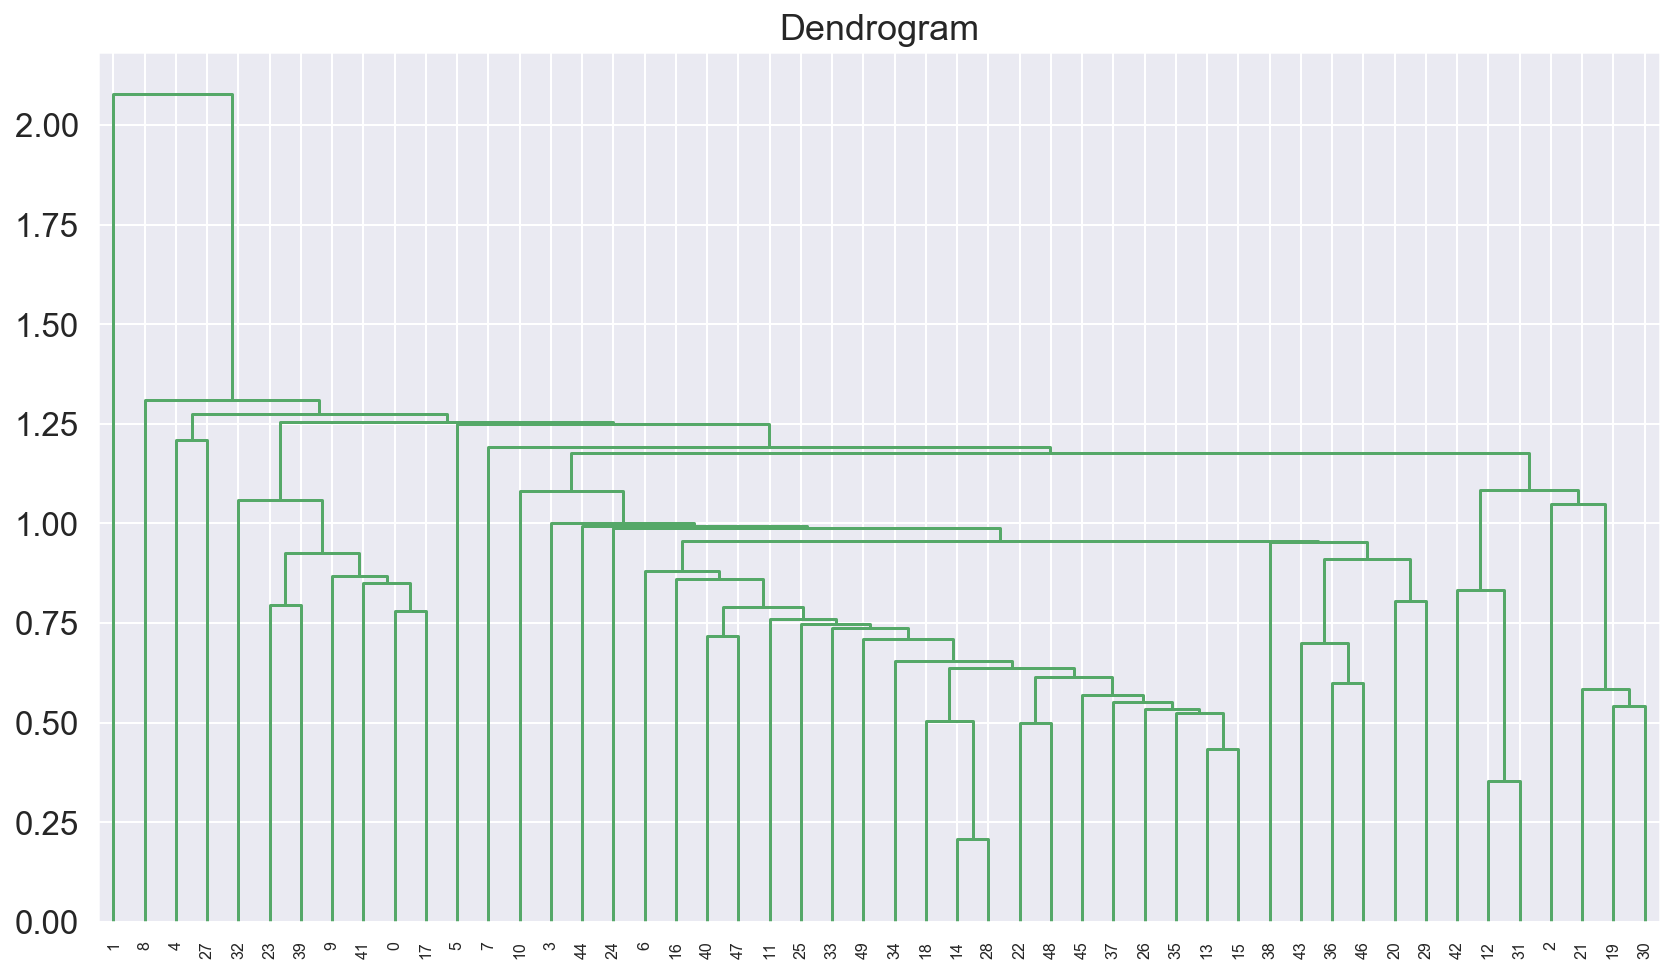

In [29]:
plt.figure(figsize=(14,8))
dendrogram(Z,orientation='top',leaf_rotation=90.,leaf_font_size=8.,color_threshold=10)
plt.title('Dendrogram')

#### 5. Perform hierarchical clustering on the first two principal components obtained in 3

- Calculate the cophenetic correlation and distances 
- Plot the resulting dendrogram
- Do you observe any differences compared to clustering on all features done in 4?

Text(0.5,1,'Dendrogram')

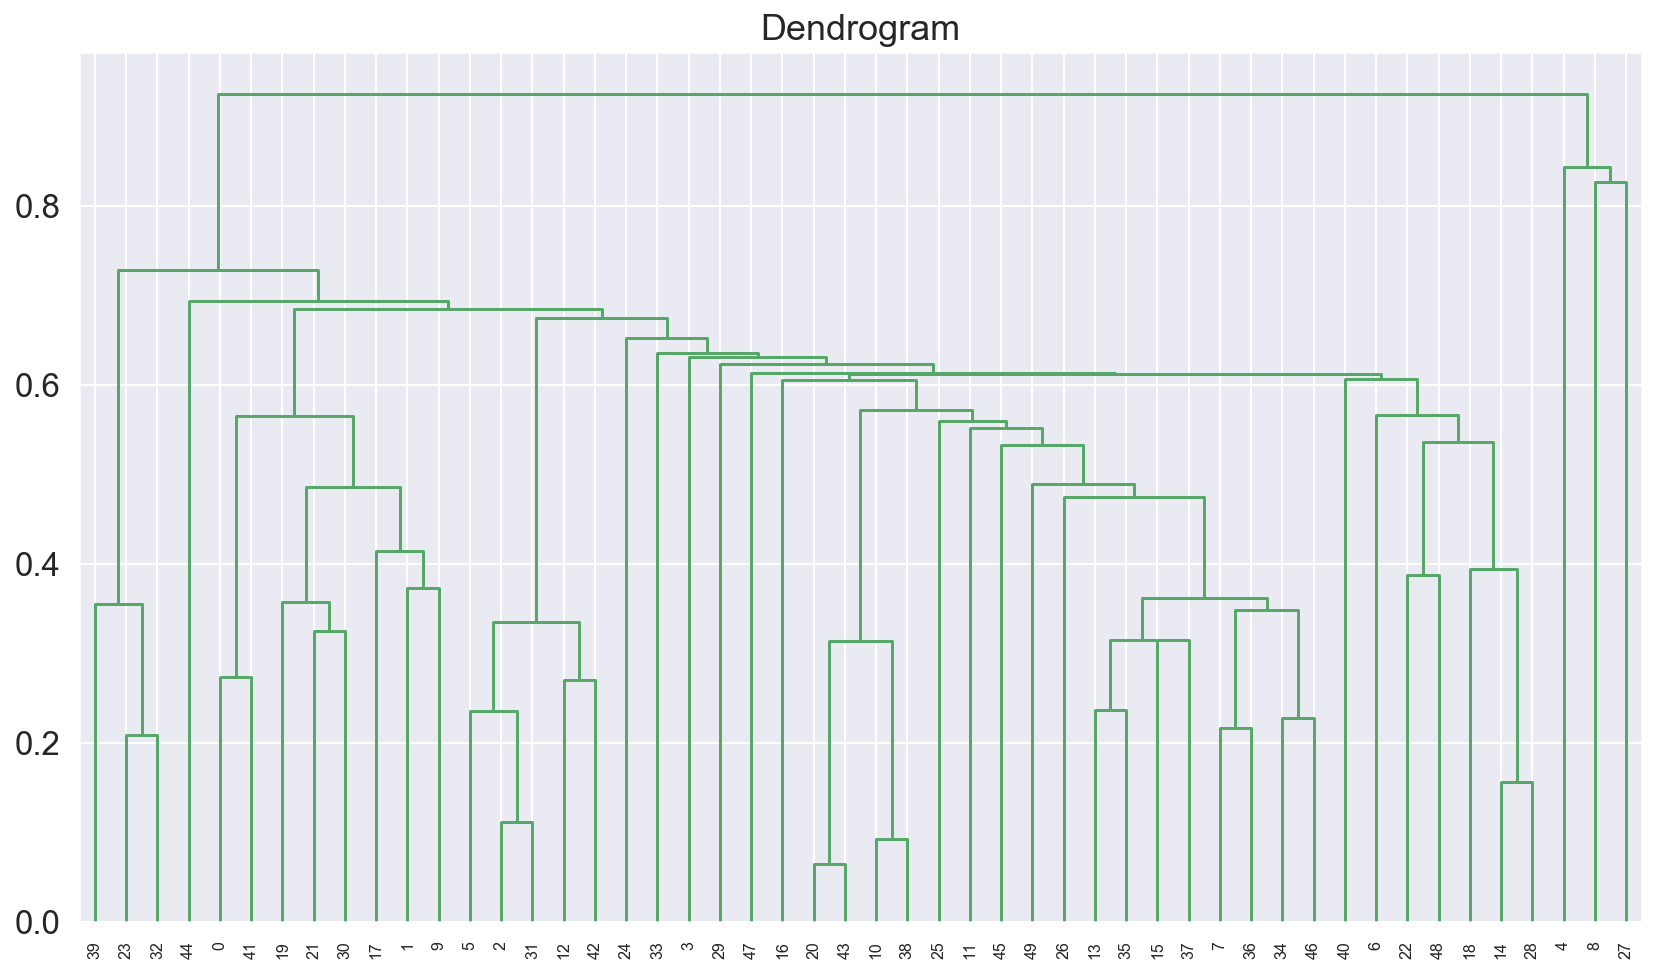

In [32]:
X_pca = df_pca[['PC1','PC2']]
Z = linkage(X_pca)
c, coph_dists = cophenet(Z, pdist(X_pca, metric='euclidean'))

plt.figure(figsize=(14,8))
dendrogram(Z,orientation='top',leaf_rotation=90.,leaf_font_size=8.,color_threshold=10)
plt.title('Dendrogram')

#### 6. Now take the clustering from 5 and obtain cluster labels for the data points using the fcluster function. 

- Vary the threshold
- Produce a plot which shows the number of different clusters obtained versus the threshold value

Text(0,0.5,'n_clusters')

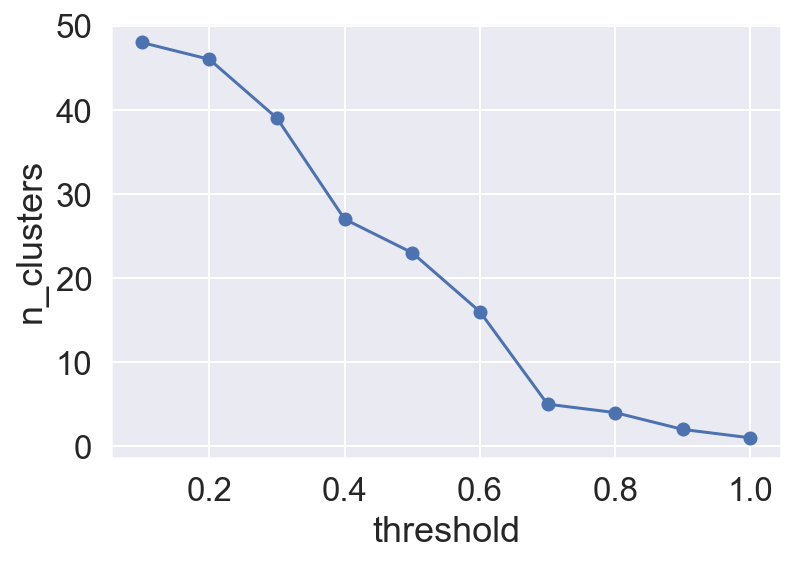

In [52]:
n_clusters = []
threshold = []
for i in range(1,11):
    threshold.append(i/10)
    clusters = fcluster(Z, i/10, criterion='distance')
    n_clusters.append(np.unique(clusters).shape[0])
    
plt.plot(threshold, n_clusters, 'bo-')
plt.xlabel('threshold')
plt.ylabel('n_clusters')

#### 7. Continue with the results from 5 and 6. 

- Set your threshold so that 4 different clusters are obtained. 
- Produce a scatter plot of the data with the points colored according to their cluster label.

In [56]:
cluster_threshold = list(zip(threshold, n_clusters))
cluster_threshold # from this I see threshold needs to equal 0.8 for 4 clusters to be obtained

[(0.1, 48),
 (0.2, 46),
 (0.3, 39),
 (0.4, 27),
 (0.5, 23),
 (0.6, 16),
 (0.7, 5),
 (0.8, 4),
 (0.9, 2),
 (1.0, 1)]

In [108]:
clusters = fcluster(Z, 0.8, criterion='distance')
clusters

array([1, 1, 1, 1, 4, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int32)

In [109]:
X_pca['cluster'] = clusters

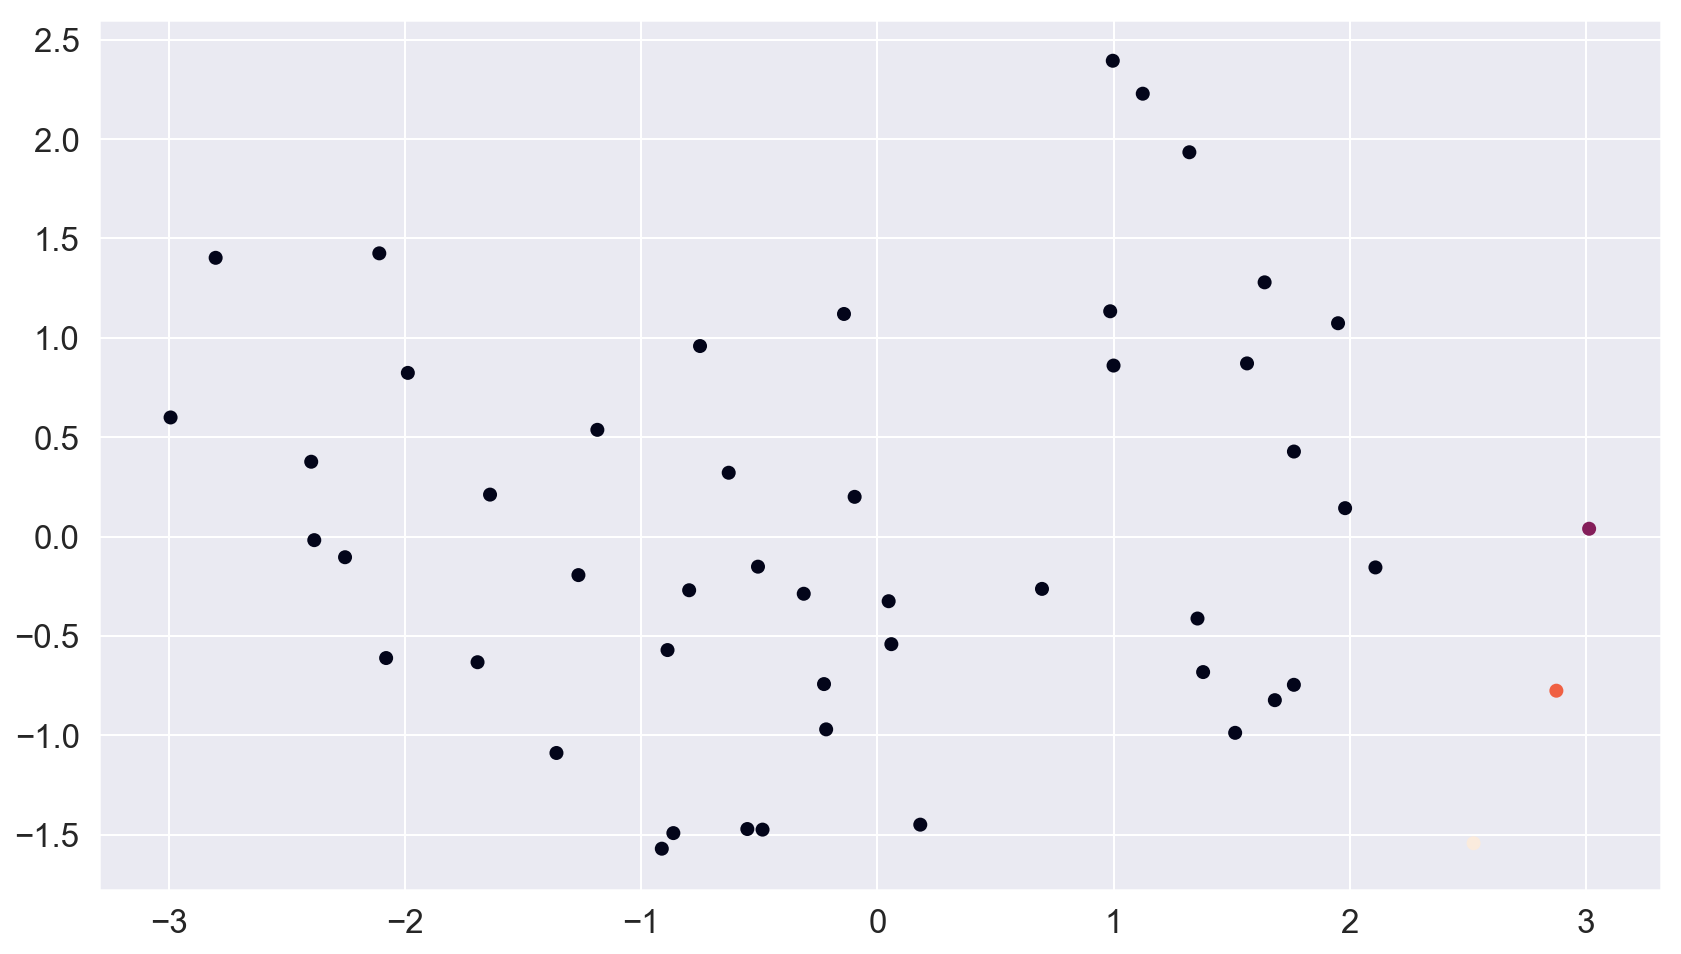

In [110]:
plt.figure(figsize=(14,8))
plt.scatter(X_pca.PC1,X_pca.PC2,c=X_pca.cluster)

#### Bonus: Annotate the points in the scatter plot by the state names and identify the states belonging to the same cluster.

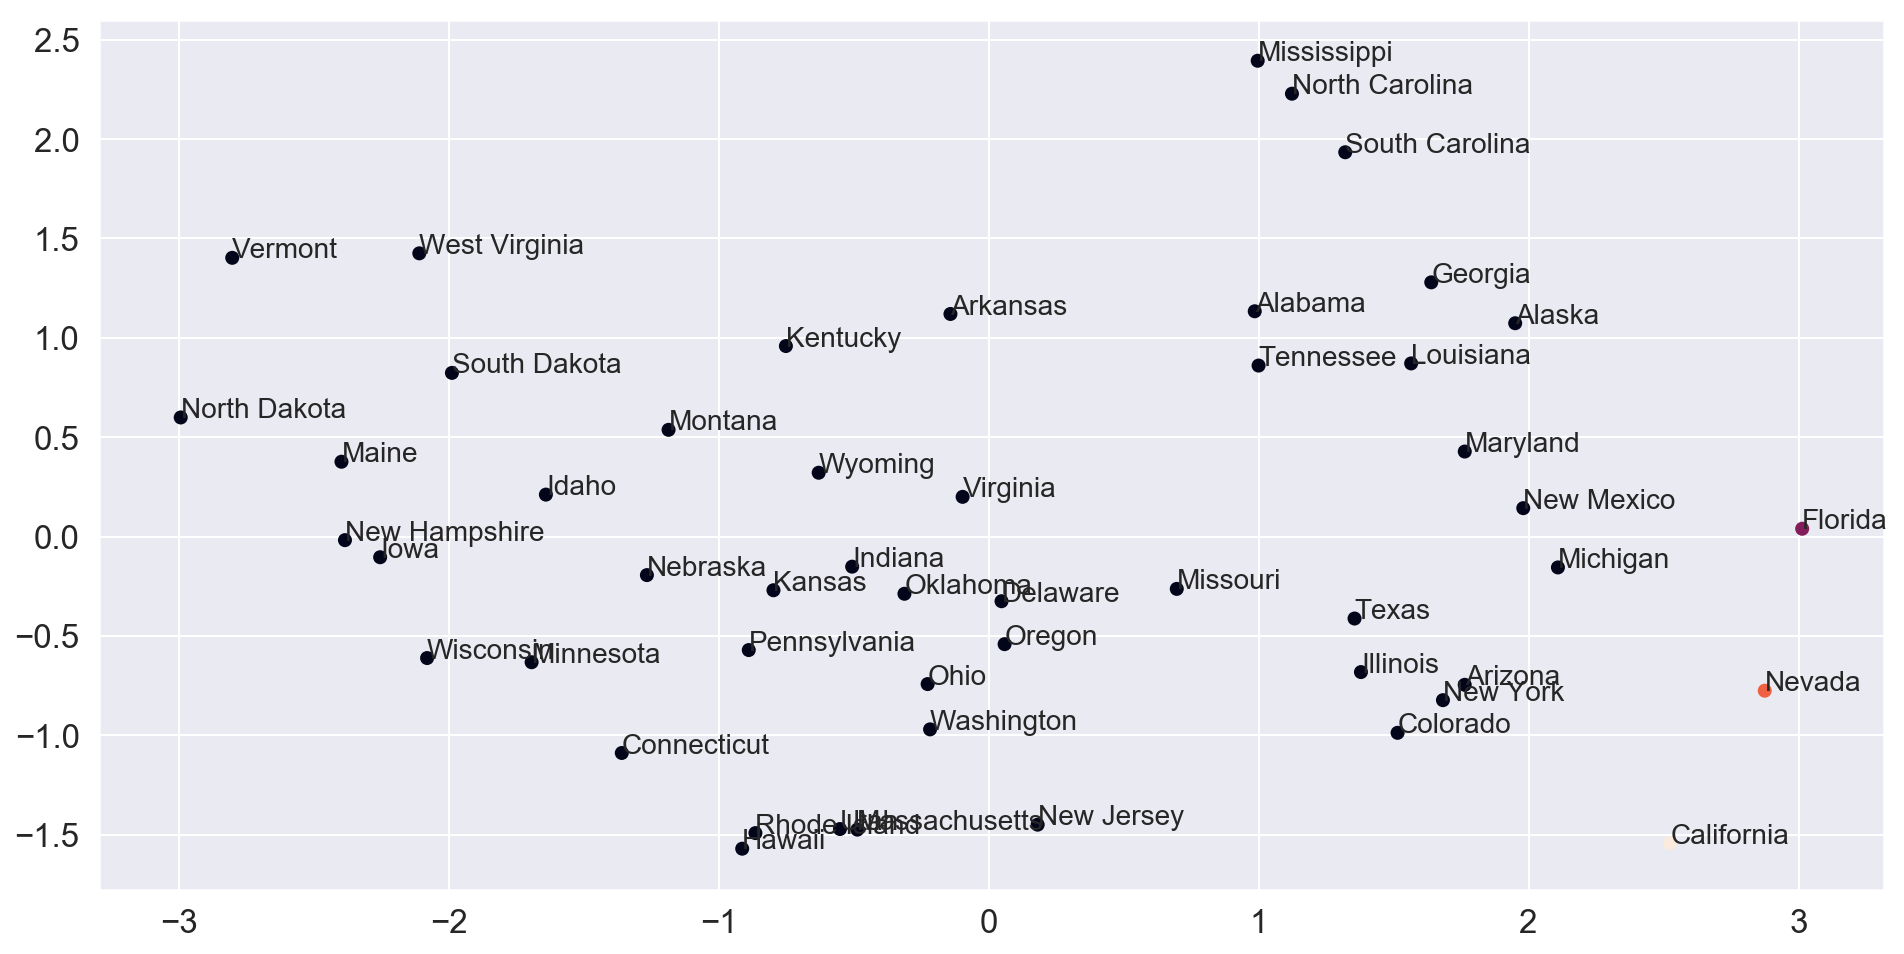

In [111]:
X_pca['States'] = df_pca.States

fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(X_pca.PC1,X_pca.PC2,c=X_pca.cluster)
for i, xi in enumerate(X_pca['States']):
   ax.annotate(xi, (X_pca.iloc[i,0], X_pca.iloc[i,1]),fontsize=14)